In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv('existing_employees.csv')
df.head(10)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low
5,2006,0.36,0.95,3,206,4,0,0,sales,low
6,2007,0.54,0.37,2,176,2,0,0,sales,low
7,2008,0.99,0.91,5,136,4,0,0,sales,low
8,2009,0.50,0.75,6,127,3,0,0,sales,low
9,2010,0.74,0.64,4,268,3,0,0,sales,low


In [10]:
# number of rowa and column
df.shape

(11428, 10)

In [13]:
# the column data type
df.dtypes

Emp ID                     int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object

In [14]:
#Count the empty (NaN, NAN, na) values in each column
df.isna().sum()

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

In [15]:
#Another check for any null / missing values
df.isnull().values.any()

False

In [16]:
#View some basic statistical details like percentile, mean, standard deviation etc.
df.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000
mean,7812.340742,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
std,3453.947461,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.159889
min,2001.000000,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,4857.750000,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.000000
50%,7714.500000,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.000000
75%,10571.250000,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.000000
max,14211.000000,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,1.000000


In [18]:
#Get a count of the number of employee salary, 
df['salary'].value_counts()

low       5144
medium    5129
high      1155
Name: salary, dtype: int64

In [19]:
#Get a count of the number of employee dept, 
df['dept'].value_counts()

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: dept, dtype: int64

/home/lib10/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='salary', ylabel='count'>

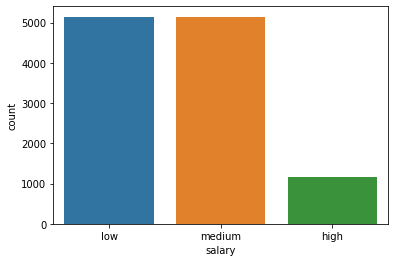

In [3]:
#Visualize this count 
sns.countplot(df['salary'])

/home/lib10/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='dept', ylabel='count'>

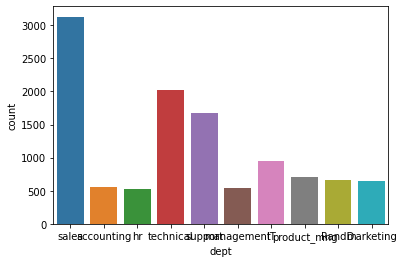

In [4]:
#Visualize this count 
sns.countplot(df['dept'])

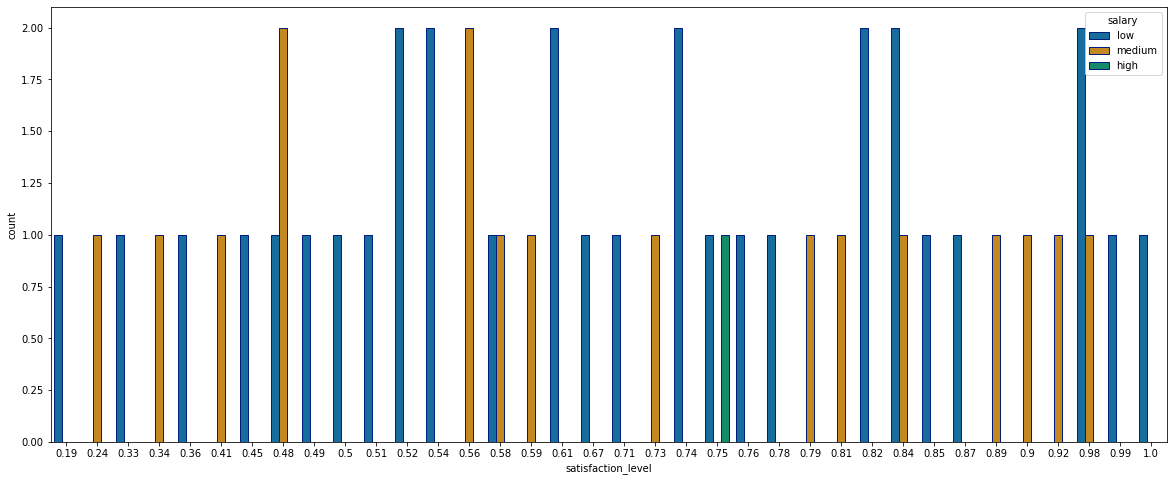

In [21]:
#Show the number of employees that left and stayed by age
import matplotlib.pyplot as plt
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(x='satisfaction_level', hue='salary', data = df.head(50), palette="colorblind", ax = ax,  edgecolor=sns.color_palette("dark", n_colors = 1));

In [22]:
#Print all of the object data types and their unique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print("_________________________________________________________________")

dept : ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'RandD' 'marketing']
sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: dept, dtype: int64
_________________________________________________________________
salary : ['low' 'medium' 'high']
low       5144
medium    5129
high      1155
Name: salary, dtype: int64
_________________________________________________________________


In [23]:
#Get the correlation of the columns
df.corr()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
Emp ID,1.000000,-0.008605,-0.018822,-0.004694,0.006287,0.250814,0.001522,0.115994
satisfaction_level,-0.008605,1.000000,0.086357,-0.092799,0.055354,-0.168791,-0.003128,0.001228
last_evaluation,-0.018822,0.086357,1.000000,0.040306,0.090304,-0.017682,-0.007416,-0.002034
number_project,-0.004694,-0.092799,0.040306,1.000000,0.070289,0.079943,0.001098,0.001676
average_montly_hours,0.006287,0.055354,0.090304,0.070289,1.000000,-0.016444,0.003285,0.007871
time_spend_company,0.250814,-0.168791,-0.017682,0.079943,-0.016444,1.000000,0.027261,0.088629
Work_accident,0.001522,-0.003128,-0.007416,0.001098,0.003285,0.027261,1.000000,0.028084
promotion_last_5years,0.115994,0.001228,-0.002034,0.001676,0.007871,0.088629,0.028084,1.000000


<AxesSubplot:>

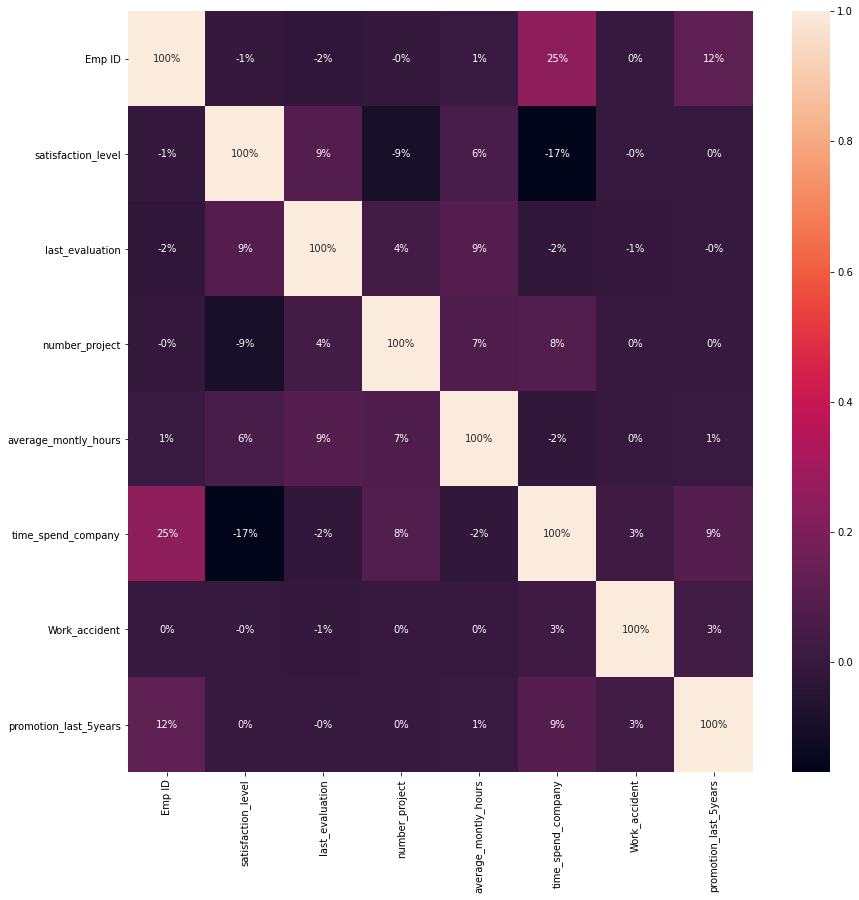

In [24]:
#Visualize the correlation
plt.figure(figsize=(14,14))  #14in by 14in
sns.heatmap(df.corr(), annot=True, fmt='.0%')